In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import random
from scipy import integrate

## e

In [18]:
theta = 5
n = 100

def create_sample(size, t):
    return [(1-x)**(1/(1-t)) for x in np.random.uniform(0, 1, size)]

sample = create_sample(n, theta)

In [19]:
theta_est = n/np.sum(np.log(sample))+1
print(f'ОМП параметра theta = {theta_est}')

ОМП параметра theta = 5.180460302912623


In [20]:
a = 2**(1/(theta_est-1)) - (1.96*np.log(2)*2**(1/(theta_est-1))) / (n**0.5*(theta_est-1))
b = 2**(1/(theta_est-1)) + (1.96*np.log(2)*2**(1/(theta_est-1))) / (n**0.5*(theta_est-1))
print(f'Доверительный интервал для медианы: ({round(a, 3)}; {round(b, 3)})')
print(f'Реальное значение медианы: {np.round(stat.median(sample), 3)}')

Доверительный интервал для медианы: (1.142; 1.219)
Реальное значение медианы: 1.202


In [21]:
omp_b =  (1.96*(theta_est-1)/n**0.5)+theta_est
omp_a = - (1.96*(theta_est-1)/n**0.5)+theta_est
print(f'Асимптотический интервал для параметра theta: ({round(omp_a, 3)}; {round(omp_b, 3)})')

Асимптотический интервал для параметра theta: (4.361; 6.0)


In [22]:
prod = np.prod(sample)
def func(x, n, prod):
    return np.exp(1-x)*(x-1)**n/((prod)**x)

res, err = integrate.quad(func, 1, 30, args=(n, prod))
c = 1/res

def func_corr(x, n, prod):
    return np.exp(1-x)*(x-1)**n/((prod)**x)*c

res = 0
f1 = 1
while res < 0.025:
    f1 += 0.001
    res, err = integrate.quad(func_corr, 1, f1, args=(n, prod))
    
f2 = f1
while res < 0.975:
    f2 += 0.001
    res, err = integrate.quad(func_corr, 1, f2, args=(n, prod))

print(f'Баессовский доверительный интервал для theta: ({round(f1, 3)}; {round(f2, 3)})')

C:\Users\Arina\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Баессовский доверительный интервал для theta: (4.302; 5.881)


## f

Параметрический

In [23]:
N_param = 50000
theta_est = n/np.sum(np.log(sample))+1
size = len(sample)

p_deltas = []
for i in range(N_param):
    cur_sample = create_sample(size, theta_est)
    cur_theta_est = n/np.sum(np.log(cur_sample))+1
    p_deltas.append(cur_theta_est - theta_est)
    
p_deltas.sort()
p_delta_025 = p_deltas[int(0.025*len(p_deltas))]
p_delta_975 = p_deltas[int(0.975*len(p_deltas))]

pbs_b = -1*(p_delta_025-theta_est)
pbs_a = -1*(p_delta_975-theta_est)

print(f'Бутстраповский (парамтерический) интервал для theta: ({round(pbs_a, 3)}; {round(pbs_b, 3)})')

Бутстраповский (парамтерический) интервал для theta: (4.226; 5.89)


Непараметрический

In [24]:
N_notparam = 1000

sample_bs = sample.copy()
sample_bs = np.repeat(sample_bs, 20)

deltas = []
for i in range(N_notparam):
    random.shuffle(sample_bs)
    cur_theta_est = n/np.sum(np.log(sample_bs[:size]))+1
    deltas.append(cur_theta_est - theta_est)
    
deltas.sort()
delta_025 = deltas[int(0.025*len(deltas))]
delta_975 = deltas[int(0.975*len(deltas))]

bs_b = -1*(delta_025-theta_est)
bs_a = -1*(delta_975-theta_est)

print(f'Бутстраповский (непарамтерический) интервал для theta: ({round(bs_a, 3)}; {round(bs_b, 3)})')

Бутстраповский (непарамтерический) интервал для theta: (4.327; 5.825)


## g

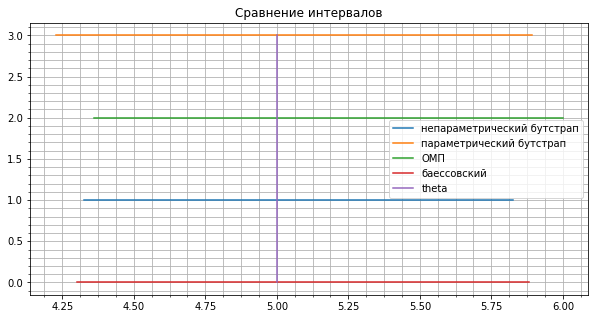

In [25]:
plt.figure(figsize=(10, 5))
plt.title("Сравнение интервалов")
plt.plot([bs_a, bs_b], [1,1], label = 'непараметрический бутстрап')
plt.plot([pbs_a, pbs_b], [3,3], label = 'параметрический бутстрап')
plt.plot([omp_a, omp_b], [2,2], label = 'ОМП')
plt.plot([f1, f2], [0,0], label = 'баессовский')
plt.plot([theta, theta], [0, 3], label = 'theta')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor')
plt.legend()